In [18]:
import os
from os import listdir
import numpy as np
import nibabel as nib #for reading .nii.gz format MRI files
import matplotlib.pyplot as plt
import pandas as pd
#import cv2 #opencv

In [40]:
import timm
import torch

# We want Penultimate Layer Features (Pre-Classifier Features), not classification
m = timm.create_model("mobilevit_xxs.cvnets_in1k", pretrained=True, num_classes=0, global_pool='')

x = torch.randn(1, 3, 224, 224) #pretrained weights need <batch B, 3 channels, H, W>
o = m(x) #torch.Size([1,1000]) ->torch.Size([1, 320, 7, 7]) 


In [24]:
#os.chdir("/Users/rita/Desktop")
#cwd = os.getcwd() #/Users/rita/Desktop/
#print(cwd)

file_dir = 'harini_lab/PROSTATEx/Files/lesions/'
csvFile_image = pd.read_csv(os.path.join(file_dir,'image_list.csv'))
csvFile_score = pd.read_csv(os.path.join(file_dir,'prostatex_classes.csv'))

img_dir_ADC = os.path.join(file_dir, 'Images/ADC') #lesions/Images/ADC/X.nii.gz
img_dir_T2 = os.path.join(file_dir, 'Images/T2') #lesions/Images/T2/X.nii.gz


/Users/rita/Desktop


(384, 384)


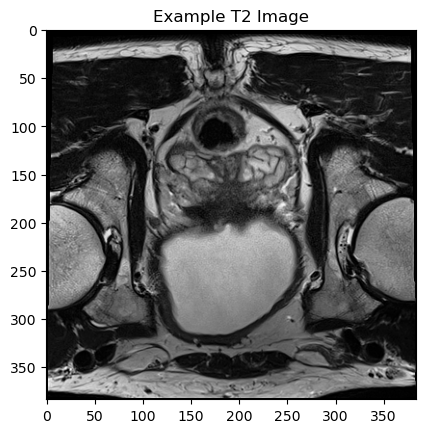

In [32]:
# example images
img_filename_ADC, img_filename_T2 = csvFile_image.iloc[10] #change for different imgs

img_complete_path_ADC = os.path.join(img_dir_ADC, img_filename_ADC) + '.nii.gz'
img_ADC = nib.load(img_complete_path_ADC)
imgdata_ADC = img_ADC.get_fdata() #(84, 128, 19)

slice_ADC = imgdata_ADC[:,:,14] #(mask at 13~17) #(84,128)
#plt.imshow(slice_ADC.T, cmap='Greys_r'); plt.title("Example ADC Image")

img_complete_path_T2 = os.path.join(img_dir_T2, img_filename_T2) + '.nii.gz'
img_T2 = nib.load(img_complete_path_T2)
imgdata_T2 = img_T2.get_fdata() #(384, 384, 19)

slice_T2 = imgdata_T2[:,:,14]
plt.imshow(slice_T2.T, cmap='Greys_r'); plt.title("Example T2 Image")
print(slice_T2.shape) 

(384, 384)


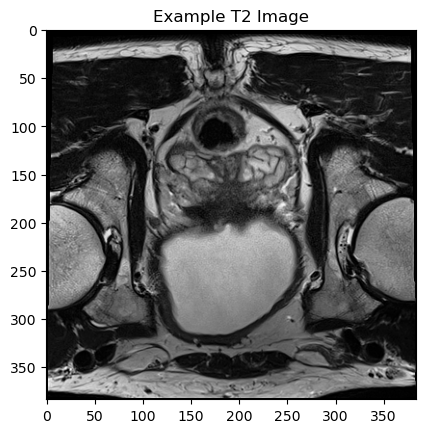

In [46]:
np.save('ex_ADC', slice_ADC)
#load example image
x = np.load('deeplabv3-mobilevitv2-0.5/ex_T2.npy') 
plt.imshow(x.T, cmap='Greys_r'); plt.title("Example T2 Image")
print(x.shape) 

0.0

In [33]:
# Feature map
m = timm.create_model('mobilevit_xxs.cvnets_in1k', features_only=True, pretrained=True)

x = slice_T2
o = m(x) #list with len=5 tensors

print(len(o))

TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
